### Logistic Regression Training on Labeled Data

In [22]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("../../models/kurdish-word2vec-75279.model")

In [23]:
# Load the preprocessed dataset
dataset_path = './dataSet/preprocessed/preprocess-40000.csv'
df = pd.read_csv(dataset_path)

In [24]:
sentiments = {
    1: {'text': 'بەتاڵ', 'english': 'empty'},
    2: {'text': 'دڵتەنگ', 'english': 'sadness'},
    3: {'text': 'پەرۆش', 'english': 'enthusiasm'},
    4: {'text': 'ئاسایی', 'english': 'neutral'},
    5: {'text': 'نیگەران', 'english': 'worry'},
    6: {'text': 'سوپرایز', 'english': 'surprise'},
    7: {'text': 'خۆشەویستی', 'english': 'love'},
    8: {'text': 'خۆشی', 'english': 'fun'},
    9: {'text': 'ڕق', 'english': 'hate'},
    10: {'text': 'بەختەوەر', 'english': 'happiness'},
    11: {'text': 'بێزار', 'english': 'boredom'},
    12: {'text': 'ئارام', 'english': 'relief'},
    13: {'text': 'تووڕە', 'english': 'anger'}
}

##### Plotting sentiment distribution from the preprocessed dataset

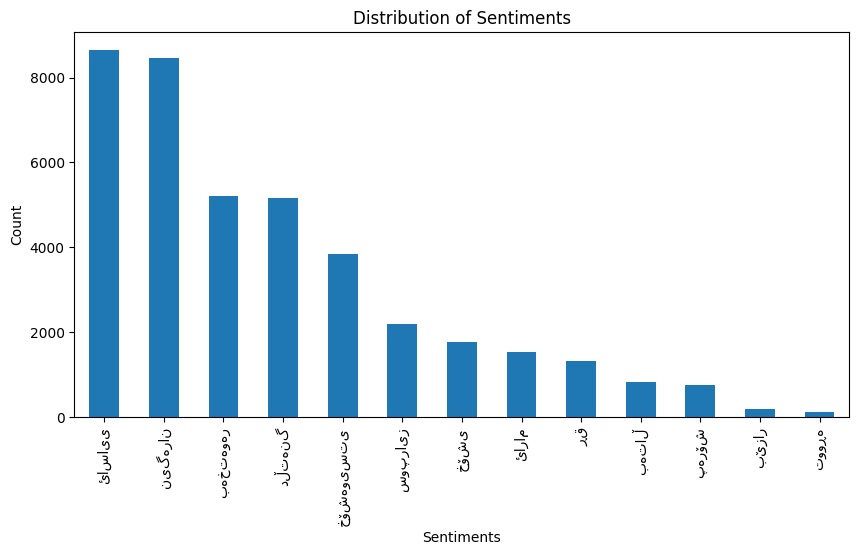

In [58]:
sentiment_distribution = df['kurdish_sentiments'].value_counts()
plt.figure(figsize=(10, 5))
sentiment_distribution.plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

##### Average word vector function to split sentences into words and return its vector based on the word2vec model


In [26]:
def get_average_word_vector(sentence, model, num_features, stopwords_path="./dataSet/kurdishStopWordsCleaned.txt"):
    with open(stopwords_path, 'r') as file:
        stopwords = set(file.read().split())
    words = sentence.split()
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in words:
        if word not in stopwords and word in model.wv.key_to_index:  # Check if word is not a stop word
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    return feature_vector / num_words if num_words > 0 else feature_vector

##### Splitting dataset into test and train and getting average word vector

In [30]:
X = df['kurdish_tweets'].astype(str)
y = df['sentiment_id']
X_vectors = np.array([get_average_word_vector(text, word2vec_model, 100) for text in X])
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:.2f}")

Accuracy: 0.29


##### Saving the trained model to a file


In [31]:
model_filename = './models/LogisticModel40000.joblib'
dump(lr, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ./models/LogisticModel40000.joblib


In [32]:
lr_filename = './models/LogisticModel40000.joblib'
lr_loaded = load(lr_filename)

In [33]:
new_text = "دڵتەنگ"
new_vector=get_average_word_vector(new_text, word2vec_model, 100)
lr_prediction = lr_loaded.predict([new_vector])
print("Predicted class:",lr_prediction, sentiments[lr_prediction[0]]['text'])


Predicted class: [2] دڵتەنگ


### Support Vector Machine Training on Labeled Data

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train, y_train)

##### Evaluate the classifier's performance


In [35]:
y_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {svc_accuracy:.2f}")

Accuracy: 0.28


In [36]:
model_filename = './models/SVC40000.joblib'
dump(svc, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ./models/SVC40000.joblib


In [44]:
svc_filename = './models/SVC40000.joblib'
svc_loaded = load(svc_filename)
new_text = "ئەوەندە خەواڵووی دیسانەوە و تەنانەت ئەوەندە درەنگ نەبووە. جارێکی تر شکست دێنم."
new_vector=get_average_word_vector(new_text, word2vec_model, 100)
svc_prediction = svc_loaded.predict([new_vector])
print("Predicted class:",svc_prediction, sentiments[svc_prediction[0]]['text'])

Predicted class: [5] نیگەران


### Random Forest Classifier Training on Labeled Data

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")

Accuracy: 0.28


In [40]:
model_filename = './models/RandomForest40000.joblib'
dump(rf, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ./models/RandomForest40000.joblib


In [41]:
rf_filename = './models/RandomForest40000.joblib'
rf_loaded = load(lr_filename)

In [43]:
#testing Random Forest model
new_text = "بێزارم"
new_vector=get_average_word_vector(new_text, word2vec_model, 100)
rf_prediction = rf_loaded.predict([new_vector])
print("Predicted class:",rf_prediction, sentiments[rf_prediction[0]]['text'])

Predicted class: [5] نیگەران


In [52]:
print(f'\n Logistic Regression Accuracy: {lr_accuracy:.2f} \n Support Vector Machine Accuracy: {svc_accuracy:.2f} \n Random Forest Accuracy: {rf_accuracy:.2f}' )


 Logistic Regression Accuracy: 0.29 
 Support Vector Machine Accuracy: 0.28 
 Random Forest Accuracy: 0.28


Text(0.5, 1.0, 'Labeled Model Accuracy')

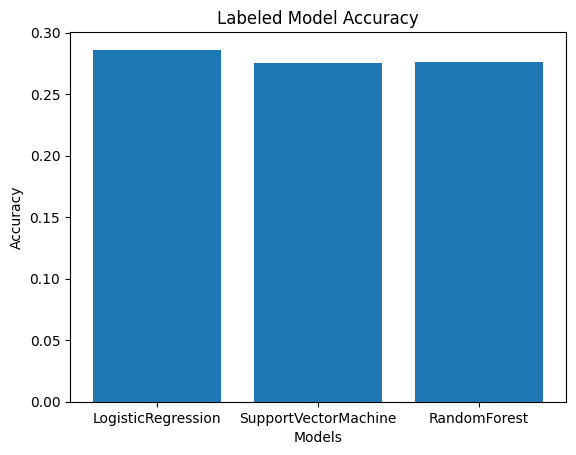

In [57]:
models=["LogisticRegression","SupportVectorMachine","RandomForest"]
accuracy_scores=[lr_accuracy,svc_accuracy,rf_accuracy]
plt.bar(models,accuracy_scores)
plt.title("Labeled Model Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Labeled Model Accuracy")